In [5]:
# imports
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
 
import scipy.stats as stats
import astropy.stats as astats
import numpy.random as random
from astropy.table import Table
import pandas as pd

# Example of simple linear regression

__Using the below code box, access the documentation for `stats.linregress`.__

__Using the below results, evaluate whether the correlation between the x and y variables is statistically significant.  Why or why not?__

slope: 2.2451 , intercept: 3.0654
rvalue: 0.7739, pvalue: 6.244e-05
std. error in slope: 0.4331


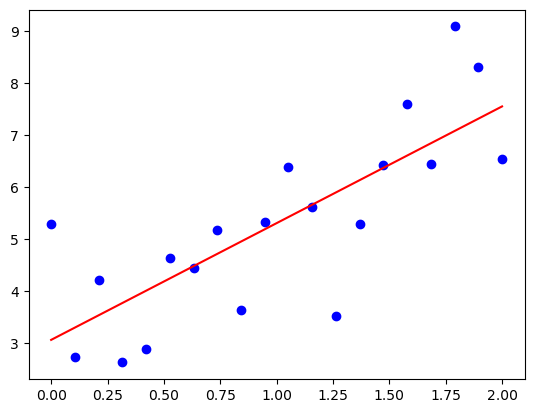

In [6]:
ndata=20
x=np.linspace(0,2,ndata)
y=3+2*x+random.randn(ndata)

slope,intercept,rvalue,pvalue,serr = stats.linregress(x,y)

print(f'slope: {slope:.4f} , intercept: {intercept:.4f}')

# square of Pearson correlation coefficient and 
#   p-value for the hypothesis that there is no correlation between the variables.
print(f'rvalue: {rvalue:.4g}, pvalue: {pvalue:.4g}')

# nominal standard error in the slope -- don't trust this!
print(f'std. error in slope: {serr:.4f}')

plt.plot(x,y,'bo')
plt.plot(x,x*slope+intercept,'r-')


Now, let's generate 1000 datasets and evaluate the slope and intercept from each via linear regression:

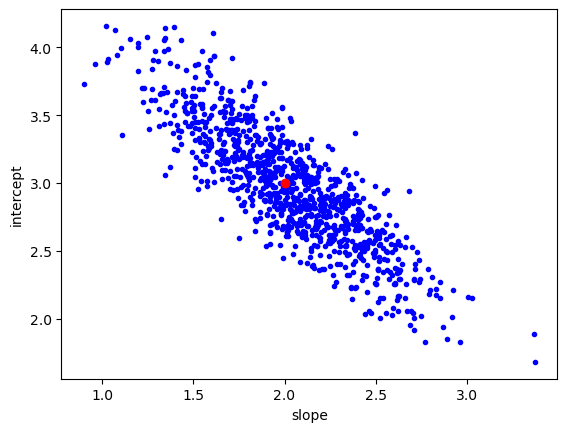

In [7]:
nsims=1000
y=np.zeros((nsims,ndata))
slope=np.zeros(nsims) 
intercept=slope.copy()
serr=slope.copy()

for i in np.arange(nsims):
    y[i,:]=3+2*x+random.randn(ndata)
    slope_tmp,intercept_tmp,r,p,serr_tmp = stats.linregress(x,y[i,:])
    intercept[i]=intercept_tmp
    slope[i]=slope_tmp
    serr[i]=serr_tmp
    
    
plt.plot(slope,intercept,'b.')
plt.xlabel('slope')
plt.ylabel('intercept')
plt.plot(2,3,'ro')

__Using the below code box, determine the standard deviation of the slope values amongst the results from the 1000 datasets, which is stored in an array named `slope`, and compare to the mean estimated standard error in the slope from the fitting routine (those values are stored in the `serr` array).__

__How well do these match in this perfectly specified case?__

__How much does the estimated`serr` value vary from dataset to dataset? (how would you measure that?)__

__What about the slope errors does the `serr` value not capture? (Take a look at the plot above!)__

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the standard deviation of the slope values
std_slope = np.std(slope)

# Calculate the mean estimated standard error in the slope
mean_serr = np.mean(serr)

# Print the results
print(f'Standard deviation of slope values: {std_slope:.4f}')
print(f'Mean estimated standard error in slope: {mean_serr:.4f}')

# Calculate the variation in the estimated serr values
std_serr = np.std(serr)
print(f'Standard deviation of serr values: {std_serr:.4f}')

# Observations about what serr does not capture can be made by analyzing the plot above.

Standard deviation of slope values: 0.3737
Mean estimated standard error in slope: 0.3622
Standard deviation of serr values: 0.0602


# Fitting for the Hubble constant with supernovae

We are going to work with the Hicken et al. ("Consitution") supernova dataset.  First, we read in the file into a pandas dataframe named `data`:

In [11]:
# CHANGE THE BELOW LINE TO POINT TO THE DIRECTORY CONTAINING SNDATA.TXT
path = './'  

# the astropy way
#data=Table.read(path+'sndata.txt',format='ascii')

# the pandas way: the file is in "fixed-width format" so we use read_fwf
data=pd.read_fwf(path+'sndata.txt')

__Explore what is in the `data` table using the code box below.__

`data` will print out a nicely formatted version, while `print(data)` will use more basic formatting.



In [12]:
data

,cz,mu,sigma_mu
0,4200.0,34.023,0.254
1,4200.0,33.860,0.260
2,4200.0,34.187,0.257
3,4200.0,33.926,0.253
4,4200.0,34.009,0.251
...,...,...,...
159,22500.0,37.719,0.178
160,22500.0,37.525,0.217
161,23700.0,37.652,0.169
162,25200.0,38.131,0.229


Let's plot distance vs. recession velocity (i.e., the original Hubble's Law), then distance modulus vs. recession velocity:

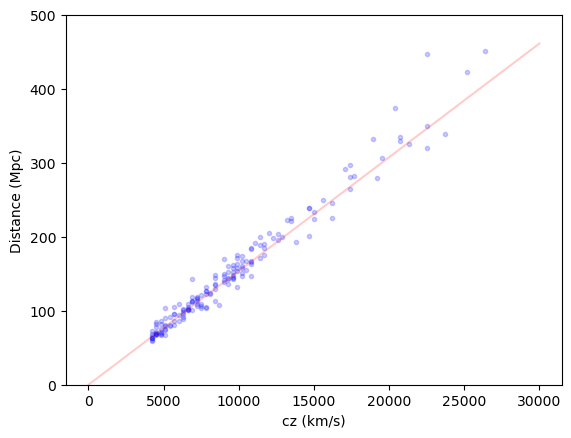

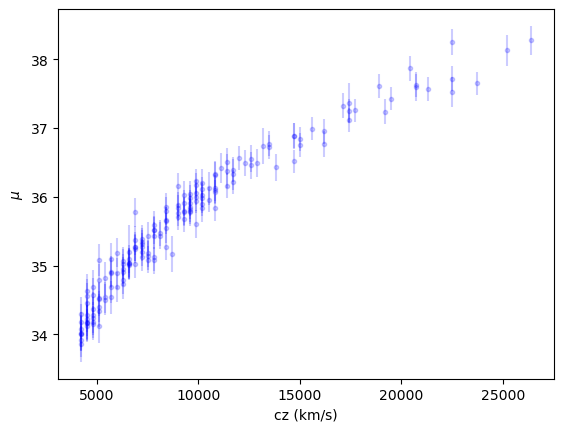

In [13]:
cz=data['cz']
mu=data['mu']
sigma_mu=data['sigma_mu']
d = 10**(mu/5)*1E-5
plt.figure()
plt.plot(cz,d,'b.',alpha=0.2)

plt.xlabel('cz (km/s)')
plt.ylabel(r'Distance (Mpc)')
plt.ylim(0,500)
plt.plot([0,3E4],[0,3E4/65.],'r-',alpha=0.2)

plt.figure()
plt.xlabel('cz (km/s)')
plt.ylabel(r'$\mu$')
plt.errorbar(cz,mu,yerr=sigma_mu,fmt='b.',alpha=0.2)

logv=np.log10(cz)

__Using the below code box, plot mu as a function of logv, with errors.__

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_34845/3594286473.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Plot of $\mu$ as a function of log v with errors')


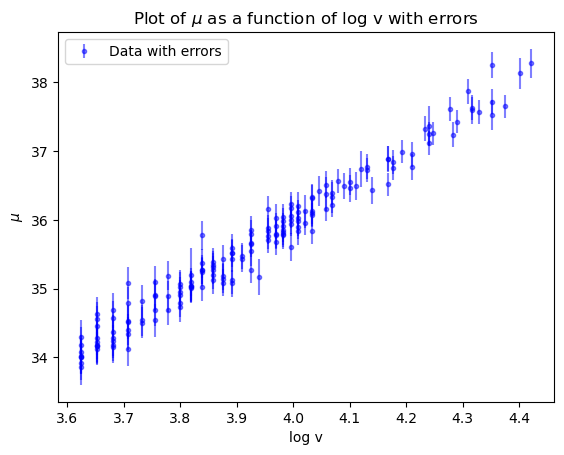

In [14]:
plt.errorbar(logv, mu, yerr=sigma_mu, fmt='b.', alpha=0.5, label='Data with errors')
plt.xlabel('log v')
plt.ylabel(r'$\mu$')
plt.title('Plot of $\mu$ as a function of log v with errors')
plt.legend()
plt.show()

## Fit with unweighted least squares

We can use `stats.linregress:`.  __Note that you need to change__ 

`if 0` __to__ 

`if 1` __to get code to execute!__

slope: 5.058 +/- 0.070
intercept: 15.765
H0: 70.31 km/sec/Mpc


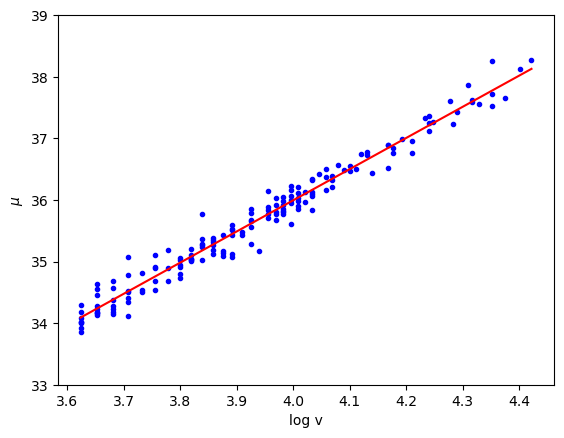

In [15]:
# scipy.stats.linregress: ordinary least-squares regression
slope,intercept,r,p,s = stats.linregress(logv,mu)

# CHANGE 0 TO 1 TO ENABLE THE PLOTS!
if 1:
    plt.plot(logv,mu,'b.')
    plt.ylim(33,39)
    plt.xlabel('log v')
    plt.ylabel(r'$\mu$')
#overplot the fit
    plt.plot(logv,logv*slope+intercept,'r-')
    print(f'slope: {slope:.3f} +/- {s:.3f}')
    print(f'intercept: {intercept:.3f}')
    print(f'H0: {(10**(-0.2*intercept-np.log10(1E-5))):.2f} km/sec/Mpc')

    mu_fit = slope*logv+intercept

### Fit with weighted least squares

The simplest routine we can use is `numpy.polyfit`.  __Look at the documentation for polyfit using the code box below.__  In general, the optimal weights for least squares is $1 \over \sigma_i^2$.  However, to weight that way, `numpy.polyfit` __requires the input_ weight array values to be__ __$1 \over \sigma_i$__.  

In [19]:
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.

    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.

    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.

    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.

    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, sh

slope: 5.054 +/- 0.070
intercept: 15.777
H0: 69.92 km/sec/Mpc +/- 9.03


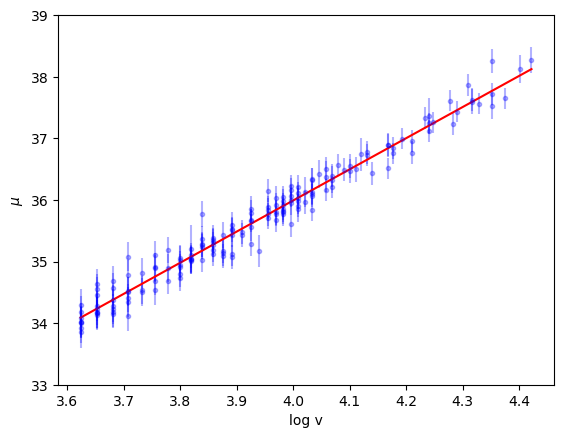

In [20]:
# np.polyfit wants 'weight' to be 1/sigma, not 1/variance,
# even though the latter is how data points will actually be weighted

weight = 1./sigma_mu


coeffsw, covarw = np.polyfit(logv,mu,1,w=weight,cov=True)
slopew = coeffsw[0]
interceptw = coeffsw[1]
sw=np.sqrt(covarw[0,0])

# CHANGE 0 TO 1 TO ENABLE THE PLOTS!
if 1:
    plt.errorbar(logv,mu,yerr=sigma_mu,fmt='b.',alpha=0.3)
    plt.ylim(33,39)
    plt.xlabel('log v')
    plt.ylabel(r'$\mu$')
    plt.plot(logv,logv*slopew+interceptw,'r-',alpha=1)
    h0errw = (10**(-0.2*(interceptw-np.sqrt(covarw[1,1]))-np.log10(1E-5)) \
             -10**(-0.2*(interceptw+np.sqrt(covarw[1,1]))-np.log10(1E-5)))/2.

    mu_fit_err = slopew*logv+interceptw

    print(f'slope: {slopew:.3f} +/- {sw:.3f}')
    print(f'intercept: {interceptw:.3f}')
    print(f'H0: {(10**(-0.2*interceptw-np.log10(1E-5))):.2f} km/sec/Mpc +/- {h0errw:.2f}')

__Are the results from the two methods consistent with our expectations (e.g. consider the slope)?__

Let's examine the scatter about the line, too.  __Examine which method gives smallest scatter about the fit line, and explain why.__


In [21]:
print(f'observed scatter without and with weighting: {np.std(mu - mu_fit):.7f}, {np.std(mu-mu_fit_err):.7f}')
print(f'expected scatter from RMS(sigma_mu): {np.sqrt(np.sum(sigma_mu**2)/len(sigma_mu)):.4f}')
print(f'expected scatter from mean(sigma_mu): {np.mean(sigma_mu):.4f}')
print(f'expected scatter from median(sigma_mu): {np.median(sigma_mu):.4f}')

observed scatter without and with weighting: 0.1790008, 0.1790023
expected scatter from RMS(sigma_mu): 0.2117
expected scatter from mean(sigma_mu): 0.2096
expected scatter from median(sigma_mu): 0.2020


### Do we see any trends of residual vs. logv?


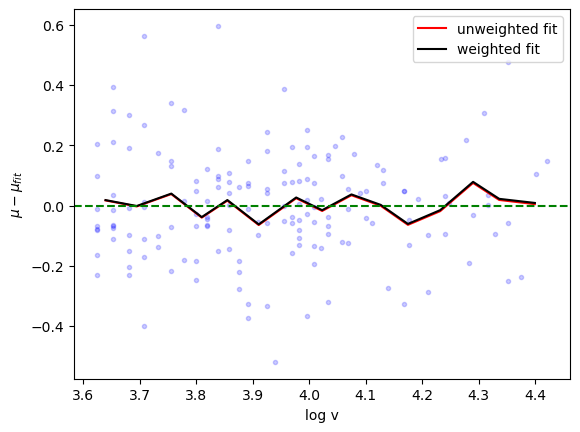

In [22]:

plt.plot(logv, mu-mu_fit,'b.',alpha=0.2)
plt.xlabel('log v')
plt.ylabel(r'$\mu - \mu_{fit}$')


# stats.binned_statistic calculates the chosen statistic
#  on the second array, binned according to the first array
logv_bin,edges,bin_numbers = stats.binned_statistic(logv,logv,statistic='mean', bins=15)

residual_bin,edges,bin_numbers = stats.binned_statistic(logv,mu-mu_fit,
                                    statistic='mean', bins=15)
plt.plot(logv_bin,residual_bin,'r-',label='unweighted fit')

residual_bin_err,edges,bin_numbers = stats.binned_statistic(logv,mu-mu_fit_err,
                                    statistic='mean', bins=15)

plt.plot(logv_bin,residual_bin_err,'k-',label='weighted fit')
plt.legend()
plt.axhline(0,color='g',ls='--')


## Polynomial fits

Let's fit a quadratic using `numpy.polyfit`:

quadratic coefficients [ 0.1637915   3.74666494 18.37932319]
H0: 21.093


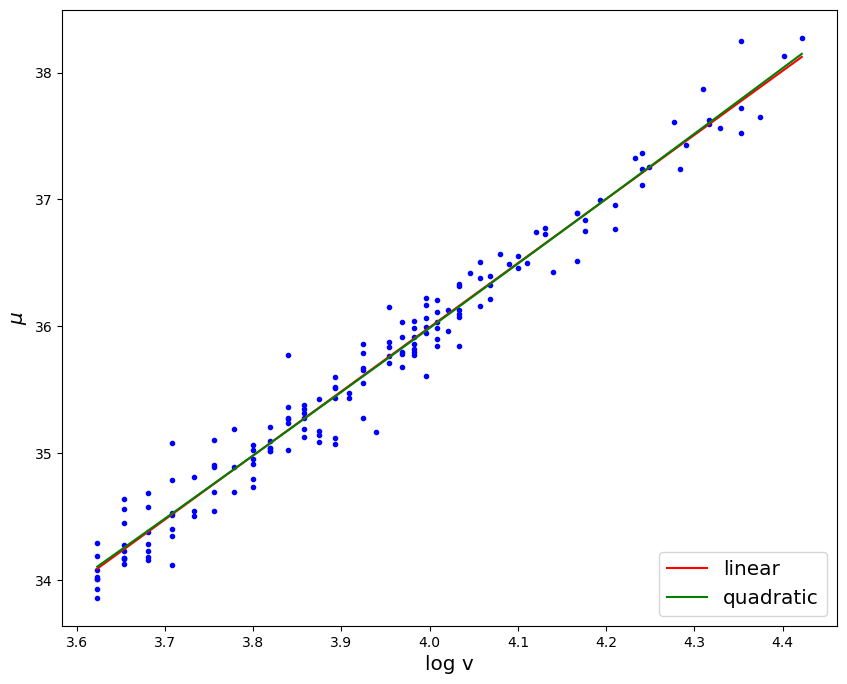

In [23]:

coeffs_quad, covar_quad = np.polyfit(logv,mu,2,w=weight,cov=True)
print('quadratic coefficients', coeffs_quad)
# note the order of the coefficients: the quadratic term is first, constant last

quad_fit = np.polyval(coeffs_quad,logv)

poly_quad = np.poly1d(coeffs_quad)
quad_fit2  = poly_quad(logv)

print(f'H0: {10**(-0.2*coeffs_quad[-1]-np.log10(1E-5)):.3f}')

if 1:
    fig=plt.figure()
        # make figure bigger in hope of being able to see
        # differences between the fits

    fig.set_size_inches(10,8) 
    plt.plot(logv,mu,'b.')
    plt.xlabel('log v',fontsize='x-large')
    plt.ylabel(r'$\mu$',fontsize='x-large')
    plt.plot(logv,mu_fit_err,'r-',label='linear')
    plt.plot(logv,quad_fit,'g-',label='quadratic')
    plt.legend(loc='lower right',fontsize='x-large')



__Enable the plots of the linear and quadratic fits and compare them to each other.__  How much do the curves differ (visually)?  How significant are the differences between the coefficients obtained in each case?  Do you recover the expected slope (i.e., what is the value for the linear term, coeffs[1]?).

__Now, using the code box box below, compute chi-squared from the weighted linear fit (using mu, mu_fit_err & sigma_mu) and from the quadratic fit (using mu, quad_fit, & sigma_mu), and see which has smaller chi-squared.__ Recall $\chi^2 = \Sigma {{(y_i - y_{pred,i})^2} \over \sigma_i^2}$ .

In [27]:
# Calculate chi-squared for the linear fit
chi_sq_linear = np.sum(((mu - mu_fit_err) ** 2) / (sigma_mu ** 2))

# Print the result
print(f'Chi-squared for linear fit: {chi_sq_linear:.3f}')

# Calculate chi-squared for the quadratic fit
chi_sq_quadratic = np.sum(((mu - quad_fit) ** 2) / (sigma_mu ** 2))

# Print the result
print(f'Chi-squared for quadratic fit: {chi_sq_quadratic:.3f}')

Chi-squared for linear fit: 120.019
Chi-squared for quadratic fit: 119.811


### Quartic fit

Now, it's easy to compare to a quartic fit too:


coefficients:  [   1.23304664  -18.9466796   109.00442569 -273.26951963  281.92213037]
H0: 0.000
chi squared - quartic: 119.607


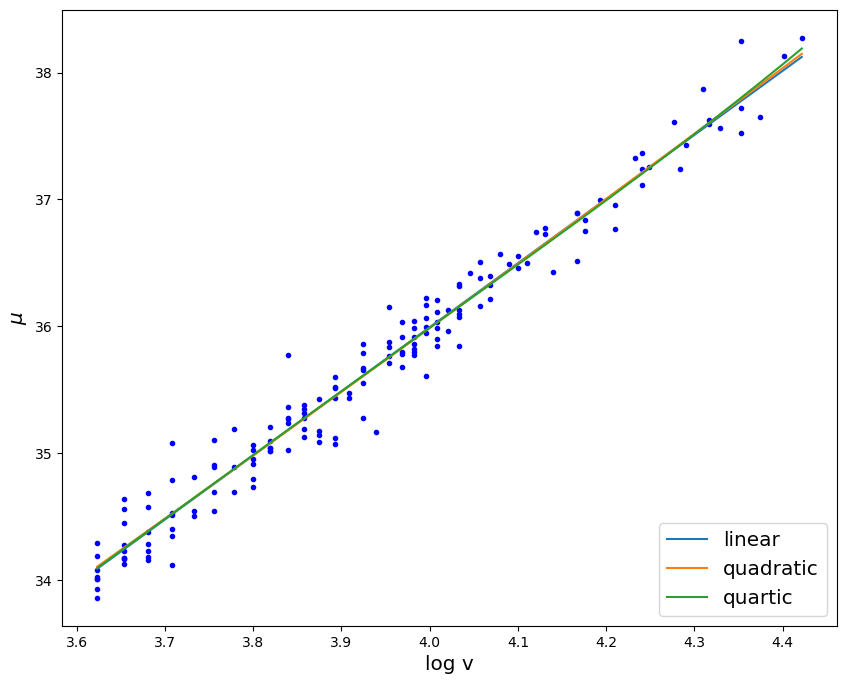

In [28]:
coeffs_quart, covar_quart = np.polyfit(logv,mu,4,w=weight,cov=True)
poly_quart = np.poly1d(coeffs_quart)
quart_fit = poly_quart(logv)
print('coefficients: ', coeffs_quart)
print(f'H0: {10**(-0.2*coeffs_quart[-1]-np.log10(1E-5)):.3f}')

print(f'chi squared - quartic: {np.sum((mu-quart_fit)**2/sigma_mu**2):.3f}')

if 1:   
    fig=plt.figure()
    fig.set_size_inches(10,8)
    plt.plot(logv,mu,'b.')
    plt.xlabel('log v',fontsize='x-large')
    plt.ylabel(r'$\mu$',fontsize='x-large')
    plt.plot(logv,mu_fit_err,label='linear')
    plt.plot(logv,quad_fit,label='quadratic')
    plt.plot(logv,quart_fit,label='quartic')
    plt.legend(loc='lower right',fontsize='x-large')

### Examining the residuals

__Are the residuals getting smaller as we increase the polynomial's order?  Do a quantitative test of this after the code to make the below plot.__

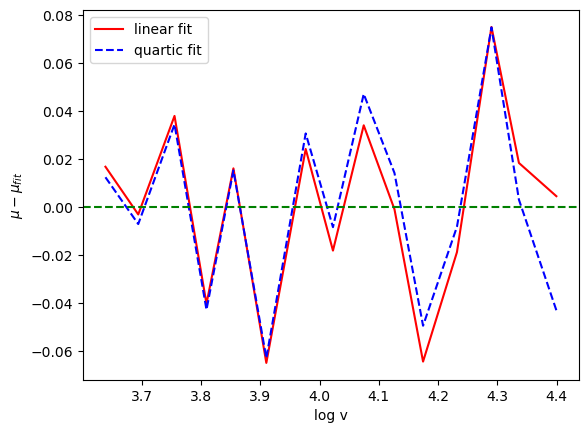

In [29]:
residual_bin_quart,edges,bin_numbers = stats.binned_statistic(logv,mu-quart_fit,
                                statistic='mean', bins=15)
plt.plot(logv_bin,residual_bin,'r-',label='linear fit')
plt.xlabel('log v')
plt.ylabel(r'$\mu - \mu_{fit}$')
plt.plot(logv_bin,residual_bin_quart,'b--',label='quartic fit')
plt.legend()

plt.axhline(0,color='g',ls='--')


__How well do the fits extrapolate?  Compare the results in the linear, quadratic and quartic fits to the below plot.__  



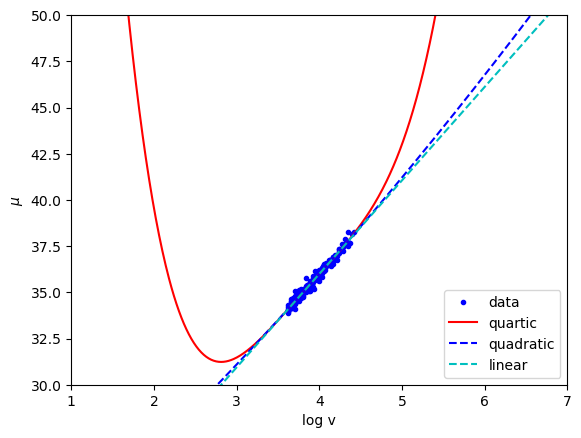

In [31]:
# Define the linear polynomial fit using the previously calculated slope and intercept
poly_lin = np.poly1d([slope, intercept])

x=np.linspace(0,10,1000)
plt.plot(logv,mu,'b.',label='data')
plt.xlim((1,7))
plt.ylim( (30,50))
plt.xlabel('log v')
plt.ylabel(r'$\mu$')
plt.plot(x,poly_quart(x),'r-',label='quartic')
plt.plot(x,poly_quad(x),'b--',label='quadratic')
plt.plot(x,poly_lin(x),'c--',label='linear')

plt.legend()

## Which fits have an acceptable chi-squared?

__Based on the following, assess which models are consistent with the data: i.e., is any statistically significant difference from the model observed?__

In [33]:
chisq_lin=np.sum( (mu - mu_fit_err)**2/sigma_mu**2)
chisq_q=np.sum( (mu - quart_fit)**2/sigma_mu**2)

print(f'chi-squared for linear: {chisq_lin:.3f}')
print(f'chi-squared for quartic: {chisq_q:.3f}')
print(f'difference: {chisq_lin-chisq_q:.3f}')

print()
print(f'alpha=0.05 chi-squared cutoff for linear: {stats.chi2.ppf(.95,162):.3f}')
print(f'alpha=0.05 chi-squared cutoff for quartic: {stats.chi2.ppf(.95,159):.3f}')

print()
print(f'p-value for linear: {1-stats.chi2.cdf(chisq_lin,162):.3g}')
print(f'p-value for quartic: {1-stats.chi2.cdf(chisq_q,159):.3g}')



chi-squared for linear: 120.019
chi-squared for quartic: 119.607
difference: 0.412

alpha=0.05 chi-squared cutoff for linear: 192.700
alpha=0.05 chi-squared cutoff for quartic: 189.424

p-value for linear: 0.994
p-value for quartic: 0.991


# Calculating information criteria

$BIC = -2~\ln{L_{max}} + k\ln{n} = \chi^2 + k \ln{n}$

$AIC = -2~\ln{L_{max}} + 2 k  +2k(k+1)/(n-k-1) = \chi^2 +2 k  +2k(k+1)/(n-k-1)$

In [ ]:
bic_lin = chisq_lin+2*np.log(len(logv))
bic_q = chisq_q+4*np.log(len(logv))

print(f'BIC: linear    {bic_lin:.3f}')
print(f'BIC: quadratic {bic_q:.3f}')

print()

k=2
aic_lin = chisq_lin+2*k+2*k*(k+1)/(len(logv)-k-1)
k=4
aic_q = chisq_q+2*k+2*k*(k+1)/(len(logv)-k-1)

print(f'AIC: linear    {aic_lin:.3f}')
print(f'AIC: quadratic {aic_q:.3f}')

# Getting bootstrap error estimates

For bootstrapping regression errors, we want to bootstrap amongst the (x,y) pairs, while keeping the values matched up to each other.  I.e.: if we draw `x[5]` for a particular bootstrap set, we use `y[5]` as the corresponding y value.  This means we will want to generate random sets of _indices_ to address multiple arrays, rather than using `np.random.choice()` on a single array.

In [ ]:
# we will generate nsims different bootstrap samples, 
#  each the same size as the original array

nsims=int(1E3)
n=len(mu)

# generate an nsims x n array of numbers ranging from 0 to n-1: 
#    these will correspond to indices in the original array
# so if bootidx[j,i] = 5, for the j'th simulation, the i'th x/y pair 
#    will correspond to supernova index 5 in the original array
bootidx=np.floor(random.rand(nsims,n)*n)
bootidx=bootidx.astype(int)

# we will need to convert pandas series to numpy arrays to make 2d 
#   bootstrap arrays: we want to take the value of each array
#   at our generated index number

logv_boot=logv.to_numpy()[bootidx]
mu_boot=mu.to_numpy()[bootidx]
w_boot=weight.to_numpy()[bootidx]
slope=np.zeros(nsims)
intercept=np.copy(slope)

for i in np.arange(nsims):
    coeffs = np.polyfit(logv_boot[i,:],mu_boot[i,:],1,w=w_boot[i,:])
    intercept[i]=coeffs[1]
    slope[i]=coeffs[0]


In the below figures, we plot the slope and intercept (or the H0 value) derived from each bootstrap sample.  __Add a point to the first figure and a vertical line to the second indicating the result of our original linear fit.  How does it compare?__

In [ ]:
if 0:
    plt.figure()
    plt.plot(slope,intercept,'b.',alpha=0.04)
    plt.xlabel('Slope',fontsize='x-large')
    plt.ylabel('Intercept',fontsize='x-large')


    plt.figure()
    h0=10**(-0.2*intercept-np.log10(1E-5))
    n,bins,edges=plt.hist(h0,bins=100,histtype='step')
    plt.xlabel('H0 (km/sec/Mpc)',fontsize='x-large')


### A note

__Distance moduli for the supernovae from Hicken et al. were produced assuming that locally $H_0$ = 65 km/sec/Mpc.  How does that compare to your results?__